<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/Nagira/ipl_deliveries_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# Read the CSV file into a DataFrame
deliveries = pd.read_csv("/content/sample_data/deliveries.csv")

In [ ]:
deliveries_copy=deliveries.copy()
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [ ]:
deliveries.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


# 1•  <b>Top Batsman by Runs:</b></n>
•	Task: Find the top 10 batsmen based on the total number of runs scored.
•	Purpose: To identify the batsmen who have scored the most runs across all matches, which is helpful for understanding player performance.


In [ ]:
# Grouped by 'batter' with their 'total_runs' for top 10 batter
top_batsmen_data = deliveries.groupby('batter', as_index='True')['batsman_runs'].sum().sort_values(ascending=False).head(10)
#top_batsmen_data = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_batsmen_data


,batsman_runs
batter,
V Kohli,8014
S Dhawan,6769
RG Sharma,6630
DA Warner,6567
SK Raina,5536
MS Dhoni,5243
AB de Villiers,5181
CH Gayle,4997
RV Uthappa,4954


<b> Bar Plot for visualization</b>

In [ ]:
# Group the data by batter and sum up the batsman_runs
top_batsmen_data = deliveries.groupby('batter', as_index=True)['batsman_runs'].sum().sort_values(ascending=False).head(10)

# Reset the index to get a proper DataFrame
top_batsmen_df = top_batsmen_data.reset_index()

# Create an interactive bar chart using Plotly
fig = px.bar(top_batsmen_df,
             x='batsman_runs',  # Use 'batsman_runs' instead of 'total_runs'
             y='batter',
             title='Top 10 Batsmen by Total Runs',
             color='batter',
             hover_data=['batsman_runs'],  # Hover will show 'batsman_runs'
             labels={'batsman_runs': 'Total Runs', 'batter': 'Batter'},
             orientation='h')  # Horizontal bar chart

# Update the layout to format the title
fig.update_layout(
    title=dict(
        text='Top 10 Batsmen by Total Runs',
        font=dict(size=24, family="Arial, sans-serif", color="black", weight="bold"),  # Bold title
        x=0.5,  # Center the title
        xanchor='center'  # Align the title center
    )
)

# Show the figure
fig.show()


# 2. <b>Top Bowlers by Wickets:</b>
•	Task: Identify bowlers who have taken the most wickets.
•	Purpose: Helps identify top wicket-takers and provide insights into effective bowling strategies.


In [ ]:
top_bowlers= deliveries.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
print(top_bowlers)

bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: is_wicket, dtype: int64


In [ ]:
top_bowlers_df = top_bowlers.reset_index()  # Convert to DataFrame for Plotly

# Create an interactive horizontal bar chart using Plotly
fig = px.bar(top_bowlers_df,
             x='is_wicket',
             y='bowler',
             title='Top 10 Bowlers by Wickets',
             color='bowler',
             hover_data=['bowler', 'is_wicket'],  # Show bowler name and wickets on hover
             labels={'is_wicket': 'Total Wickets', 'bowler': 'Bowler'},
             orientation='h')  # Horizontal bar chart

#fig.size = (8, 6)  # Set the figure size
# Update layout for title
fig.update_layout(
    title=dict(
        text='   Top 10 Bowlers by Wickets',
        font=dict(size=24, family="Arial, sans-serif", color="black", weight="bold"),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='Total Wickets',
    yaxis_title='Bowler'
)

for i in range(len(top_bowlers_df)):
    fig.add_annotation(
        x=top_bowlers_df['is_wicket'].iloc[i] - 5,  # Add a slight offset for better visibility
        y=top_bowlers_df['bowler'].iloc[i],  # Use bowler name for correct placement
        text=str(top_bowlers_df['is_wicket'].iloc[i]),  # Display the number of wickets
        showarrow=False,
        font=dict(size=12, color='black'),
        xref='x',  # Reference to the x-axis
        yref='y'   # Reference to the y-axis
    )


# Show the figure
fig.show()

# 3. <b>Run Distribution by Over:</b></n>
•	Task: Analyze how runs are distributed across different overs.
•	Purpose: Understand in which phases (e.g., powerplay, middle overs, death overs) teams score the most runs, aiding in strategic planning


In [ ]:

# Grouped 'over' and sum of 'total_runs' for each over
runs_by_over = deliveries.groupby('over')['total_runs'].sum()
print('Distribution of runs by over\n ',runs_by_over)


Distribution of runs by over
  over
0     13651
1     16163
2     17895
3     18415
4     18565
5     18528
6     14839
7     15981
8     16639
9     16353
10    16779
11    17076
12    17205
13    17634
14    18149
15    18472
16    19012
17    19559
18    19076
19    17765
Name: total_runs, dtype: int64


<b> Visualization Using line plot</b>

In [ ]:
runs_by_over_df = runs_by_over.reset_index()
fig = px.line(runs_by_over_df,
              x='over',
              y='total_runs',
              title='Run Distribution by Over',
              markers=True)  # Markers for better visibility on data points

# Update layout for title and axis labels
fig.update_layout(
    title=dict(
        text='Run Distribution by Over',
        font=dict(size=24, family="Arial, sans-serif", color="black", weight="bold"),
        x=0.5,  # Center the title
        xanchor='center'
    ),
    xaxis_title='Over',
    yaxis_title='Total Runs',
    xaxis=dict(
        tickmode='linear'  # Ensure each over is represented in ticks
    ),
    yaxis=dict(
        titlefont=dict(size=14),
        tickfont=dict(size=12)
    ),
    hovermode="x unified"  # Unified hover mode to see runs for all overs
)

# Show the figure
fig.show()

<b> 3. Runs Distribution over 'Powerplay', 'Middle Overs', 'Death Overs'</b>

In [ ]:
deliveries['match_phase'] = pd.cut(deliveries['over'], bins=[0, 6, 15, 20], labels=['Powerplay', 'Middle Overs', 'Death Overs'])

# Group by 'match_phase' and sum the 'total_runs'
run_distribution_by_phase = deliveries.groupby('match_phase')['total_runs'].sum()

print(run_distribution_by_phase)

match_phase
Powerplay       104405
Middle Overs    154288
Death Overs      75412
Name: total_runs, dtype: int64


<ipython-input-28-5b1fcd32c09b>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# <b> 3. Runs Distribution over 'Powerplay', 'Middle Overs', 'Death Overs' for individual batting team</b>

In [ ]:

# Grouped 'batting_team' and 'match_phase', and sum the 'total_runs'
run_distribution_by_team_phase = deliveries.groupby(['batting_team', 'match_phase'], observed=True)['total_runs'].sum().astype(int)

print(run_distribution_by_team_phase)

batting_team                 match_phase 
Chennai Super Kings          Powerplay       11379
                             Middle Overs    16937
                             Death Overs      9061
Deccan Chargers              Powerplay        3407
                             Middle Overs     5035
                             Death Overs      2539
Delhi Capitals               Powerplay        4706
                             Middle Overs     6401
                             Death Overs      3141
Delhi Daredevils             Powerplay        7506
                             Middle Overs    10750
                             Death Overs      5043
Gujarat Lions                Powerplay        1609
                             Middle Overs     2123
                             Death Overs       921
Gujarat Titans               Powerplay        2216
                             Middle Overs     3430
                             Death Overs      1823
Kings XI Punjab              Powerplay  

<b> Visualization using heatmap </b>

In [ ]:
run_distribution_unstacked = run_distribution_by_team_phase.unstack()
run_distribution_unstacked_df=run_distribution_unstacked.reset_index()
# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=run_distribution_unstacked_df.values,
    x=run_distribution_unstacked_df.columns,
    y=run_distribution_unstacked_df.index,
    colorscale='Viridis',
    hoverongaps=False,
    text=run_distribution_unstacked.values,  # Set text for each cell
    texttemplate='<b>%{text}</b>',  # Show the text from the 'text' argument
    hoverinfo='text'  # Show text on hover
))
fig.update_layout(
    title='Run Distribution by Batting Team and Match Phase',
    xaxis_title='Match Phase',
    yaxis_title='Batting Team'
)
# Update layout for titles and axis labels
'''annotations = []
for i in range(run_distribution_unstacked.shape[1]):  # For each match phase (column)
    for j in range(run_distribution_unstacked.shape[0]):  # For each batting team (row)
        annotations.append(
            dict(
                x=i,  # Column index
                y=j,  # Row index
                text=str(int(run_distribution_unstacked.values[j, i])),  # Total runs
                font=dict(color='black', size=10),
                showarrow=False,
                xanchor='center',  # Center the text horizontally
                yanchor='middle'    # Center the text vertically
            )
        )
'''
# Show the figure
fig.show()

# <b> 4. Extras Breakdown:</B>
•	Task: Investigate the distribution of extras (e.g., wides, no-balls, byes).
•	Purpose: Shows how often extras occur, identifying areas where teams lose control during the game.


In [ ]:
# Filtered the data to include only specific extras -wides, no-balls, byes, leg-byes
specific_extras = deliveries[deliveries['extras_type'].isin(['wides', 'noballs', 'byes', 'legbyes'])]

# Grouped 'extras_type' to count the occurrences of each specific extra
specific_extras_breakdown = specific_extras['extras_type'].value_counts()

print(specific_extras_breakdown)

extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
Name: count, dtype: int64


In [ ]:
# Create a pie chart with different colors
extras_df = specific_extras_breakdown.reset_index()
extras_df.columns = ['Extras Type', 'Count']

# Create a pie chart using Plotly
fig = px.pie(extras_df, values='Count', names='Extras Type',
             title='Breakdown of Specific Extras',
             color_discrete_sequence=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

fig.show()

<b> Distribution of extras correspond to batting team </b>

extras_type                  byes  legbyes  noballs  wides
batting_team                                              
Chennai Super Kings            62      423      131    894
Deccan Chargers                33      156       45    237
Delhi Capitals                 17      138       46    349
Delhi Daredevils               49      314       64    565
Gujarat Lions                   7       63       16    111
Gujarat Titans                 12       77       28    196
Kings XI Punjab                83      396       67    671
Kochi Tuskers Kerala            7       26       11     61
Kolkata Knight Riders          78      479      111   1018
Lucknow Super Giants           12       70       19    230
Mumbai Indians                 78      498      124   1063
Pune Warriors                  10       90       23    145
Punjab Kings                   11      103       39    273
Rajasthan Royals               62      363      122    804
Rising Pune Supergiant          5       24        1     

<Figure size 800x600 with 0 Axes>

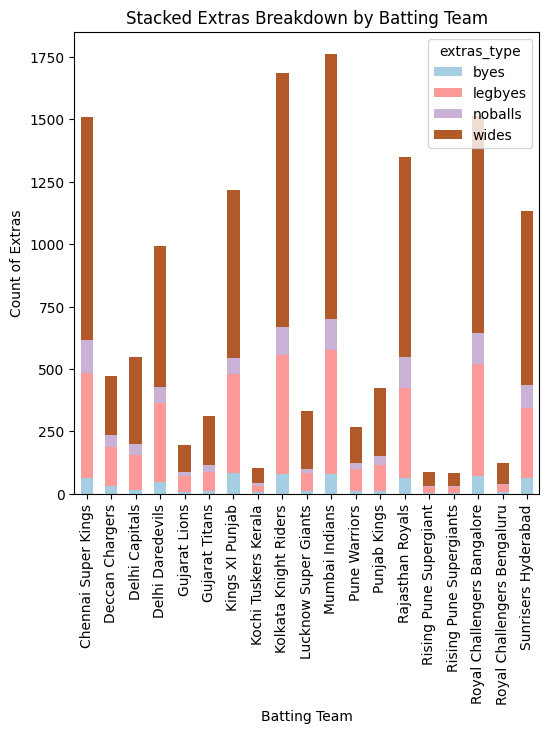

In [ ]:

# Grouped 'batting_team' and 'extras_type' to count the occurrences of extras
extras_by_team = specific_extras.groupby(['batting_team', 'extras_type']).size().unstack(fill_value=0)

print(extras_by_team)
plt.figure(figsize=(8, 6))

# stacked bar plot
extras_by_team.plot(kind='bar', stacked=True, figsize=(6, 6), colormap='Paired')

plt.title('Stacked Extras Breakdown by Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Count of Extras')
plt.show()



<b> Distribution of extras correspond to Bowling team </b>

extras_type                  byes  legbyes  noballs  wides
bowling_team                                              
Chennai Super Kings            60      421       97    946
Deccan Chargers                31      166       49    280
Delhi Capitals                 24      144       47    387
Delhi Daredevils               39      324       86    550
Gujarat Lions                   7       55        7     91
Gujarat Titans                  7       68       12    149
Kings XI Punjab                52      362      100    720
Kochi Tuskers Kerala            2       29        7     52
Kolkata Knight Riders          99      451      135    848
Lucknow Super Giants           10       75       24    193
Mumbai Indians                 78      497      144   1090
Pune Warriors                  18       71       26    120
Punjab Kings                   19       95       24    234
Rajasthan Royals               83      426      104    949
Rising Pune Supergiant          3       34        1     

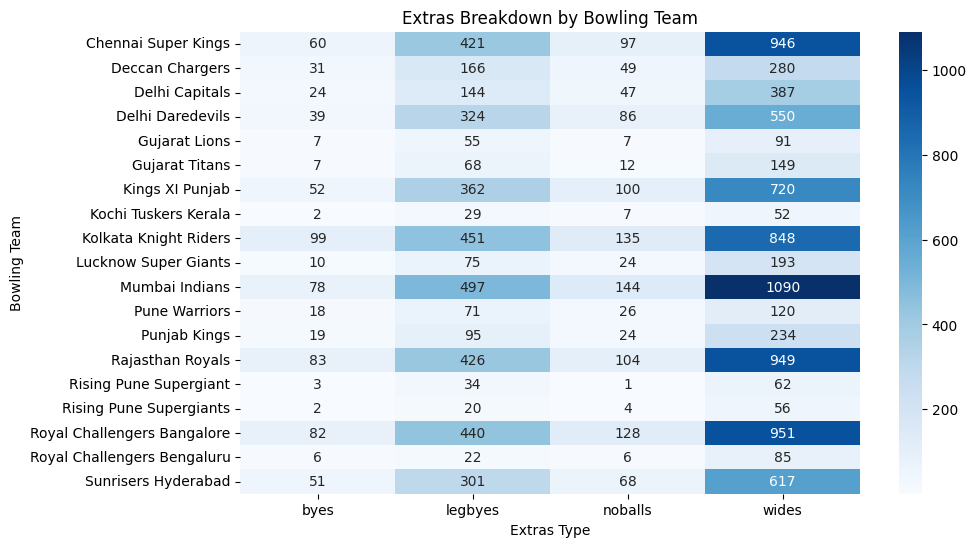

In [ ]:
# Group by 'bowling_team' and 'extras_type' to count the occurrences of extras
extras_by_bowling_team = specific_extras.groupby(['bowling_team', 'extras_type']).size().unstack(fill_value=0)

print(extras_by_bowling_team)
plt.figure(figsize=(10, 6))

sns.heatmap(extras_by_bowling_team, annot=True, cmap="Blues", fmt='d')

plt.title('Extras Breakdown by Bowling Team')
plt.xlabel('Extras Type')
plt.ylabel('Bowling Team')
plt.show()


# **5•  Dismissal Types:**
•	Task: Analyze types of dismissals (e.g., bowled, caught, LBW).
•	Purpose: Highlights common ways wickets are taken, which is useful for understanding team strategies and bowling effectiveness.


<Figure size 1000x600 with 0 Axes>

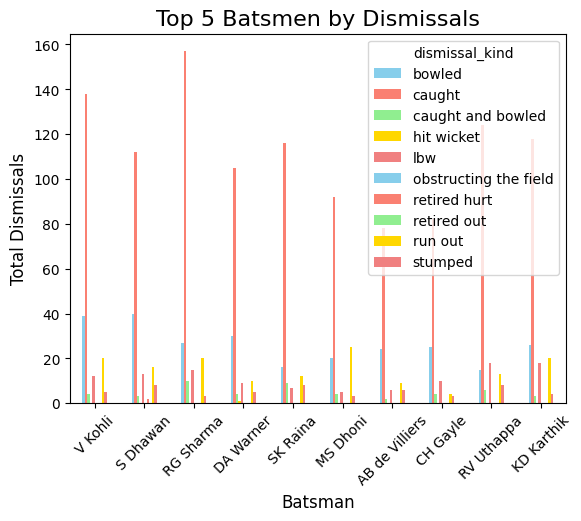

In [ ]:
# Filter - to include only rows where a dismissal occurred
dismissals = deliveries[deliveries['dismissal_kind'].notna()]

#dismissal_by_batsman = dismissals[(dismissals['batter'] == 'SC Ganguly') & (dismissals['dismissal_kind'] == 'caught')]


# Group by 'batter' and 'dismissal_kind' to get the count of each dismissal type
dismissal_by_batsman = dismissals.groupby(['batter', 'dismissal_kind']).size().unstack(fill_value=0)
top_batsmen_dismissals = dismissal_by_batsman.loc[top_batsmen_data.index]
#print(dismissal_by_batsman)

top_batsmen = dismissal_by_batsman.sum(axis=1).sort_values(ascending=False).head(5)
#print(top_batsmen)

# Get the top 5 batsmen by total dismissals
#top_batsmen = total_dismissals.nlargest(5)

plt.figure(figsize=(10, 6))
top_batsmen_dismissals.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral'])

plt.title('Top 5 Batsmen by Dismissals', fontsize=16)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Total Dismissals', fontsize=12)

plt.xticks(rotation=45)
plt.show()



In [ ]:

# Calculated total runs scored by each team
total_runs_by_team = deliveries.groupby('batting_team')['total_runs'].sum()

# Calculated number of matches played by each team
# Each match has multiple overs; to find the unique matches played, count the match_id
matches_played = deliveries.groupby('batting_team')['match_id'].nunique()

# Calculate the average runs per match
average_runs_per_match = total_runs_by_team / matches_played

# Step 4: Combine total runs and average runs into a DataFrame
results = pd.DataFrame({
    'Total Runs': total_runs_by_team,
    'Matches Played': matches_played,
    'Average Runs per Match': average_runs_per_match
}).reset_index()

# Display the result
print(results)


                   batting_team  Total Runs  Matches Played  \
0           Chennai Super Kings       38629             237   
1               Deccan Chargers       11463              75   
2                Delhi Capitals       14900              91   
3              Delhi Daredevils       24296             161   
4                 Gujarat Lions        4862              30   
5                Gujarat Titans        7757              45   
6               Kings XI Punjab       30064             190   
7          Kochi Tuskers Kerala        1901              14   
8         Kolkata Knight Riders       39331             251   
9          Lucknow Super Giants        7510              44   
10               Mumbai Indians       42176             261   
11                Pune Warriors        6358              45   
12                 Punjab Kings        9536              56   
13             Rajasthan Royals       34747             220   
14       Rising Pune Supergiant        2470            